In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## assign SICs

In [2]:
sics = pd.read_csv('1504_Companies_MASTER.csv', dtype={'SIC': 'S'})
sics = sics[['SIC','SIC Description']].drop_duplicates(keep="first")

In [3]:
cs = pd.read_csv('companies-and-sectors')

In [4]:
country = pd.read_csv('csv/country31may2015.csv',
                     dtype={'CIKNUMBER': 'I',
                           'IRSNUMBER': 'S',
                           'TAXHAVEN': 'S'} )

CIKNUMBER - chamber of commerce nr <br>
IRSNUMBER - tax number <br>
NAME - company name <br>
DATADATE - date of establishment <br>
FILEDATE - file date <br>
INCSTATE - state of incorporation <br>
HQSTATE - state where headquarters is <br>
ISO3 - subsidiary ISO3 <br>
COUNTRY - subsidiary company country <br>
TAXHAVEN - subsidiary company a tax haven? <br>
COUNTRYCOUNT - amount of branches in the country <br>
TOTALCOUNT - total amount of subsidiary branches <br>
NCOUNTRIES - total amount of countries with subsidiaries <br>


merge all according to SICS

In [7]:
merged = pd.merge(left=country, right=cs, left_on ="CIKNUMBER", right_on="cik")
merged['year'] = pd.to_datetime(merged['DATADATE']).dt.year

## ALL COMPANIES

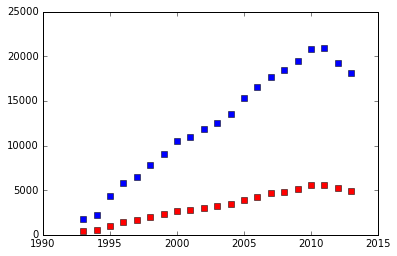

In [8]:
filtered = pd.DataFrame(merged.groupby(by=['year', 'TAXHAVEN']).count()['NAME'])
plt.plot(filtered.index.levels[0].tolist()[7:-1], filtered.filter(like='1.0', axis =0)['NAME'].tolist()[:-1],
         'rs',filtered.index.levels[0].tolist()[7:-1],filtered.filter(like='0.0', axis =0)['NAME'].tolist()[:-1],'bs')

In [9]:
filtered.index.levels[0].tolist()[7:]

[1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014]

merge only extractive according to to SICS

In [10]:
extractive = pd.merge(left=merged, right=sics, left_on = "sic", right_on="SIC")

In [11]:
extractive['year'] = pd.to_datetime(extractive['DATADATE']).dt.year

In [12]:
extractive = pd.DataFrame(extractive.groupby(by=['year', 'TAXHAVEN']).count()['NAME'])

In [13]:
extractive.head()

NAME
year TAXHAVEN      
1993 0.0        179
     1.0         46
1994 0.0        189
     1.0         49
1995 0.0        342

In [14]:
extractive.filter(like='1.0', axis =0)['NAME'].tolist()

[46,
 49,
 96,
 125,
 151,
 148,
 188,
 181,
 194,
 220,
 221,
 202,
 224,
 237,
 265,
 288,
 346,
 332,
 330,
 311,
 281,
 32]

# EXTRACTION COMPANIES

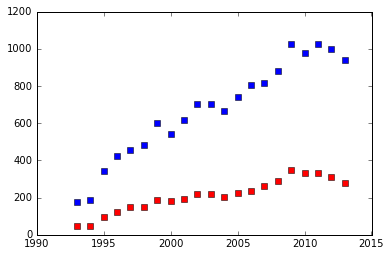

In [15]:
plt.plot(extractive.index.levels[0].tolist()[:-1], extractive.filter(like='1.0', axis =0)['NAME'].tolist()[:-1],
         'rs',extractive.index.levels[0].tolist()[:-1],extractive.filter(like='0.0', axis =0)['NAME'].tolist()[:-1],'bs')